In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import decision_tree
import utils

In [2]:
iris = load_iris()

In [3]:
# print(model.tree, "\n")
# print(model.tree.left, "\n")
# print(model.tree.left.left, "\n")
# print(model.tree.left.right, "\n")
# print(model.tree.right, "\n")
# print(model.tree.right.left, "\n")
# print(model.tree.right.right, "\n")

In [4]:
def train_classification(model, show=False):
    model.fit(X=iris.data[:, 2:], y=iris.target)
    acc = utils.accuracy(y_pred=model.predict(iris.data[:, 2:]), y_true=iris.target)
    risk = utils.empirical_risk(model, iris.data[:, 2:], iris.target)
    print(model)
    print("Empirical risk:", risk)
    print("Train accuracy:", acc)
    if show: model.show()

DecisionTree(cost=gini, max_depth=2, min_samples_per_leaf=None, min_samples_per_split=None, max_features=None, pure_node=False, max_leaf_nodes=None)
Empirical risk: 0.04
Train accuracy: 0.96


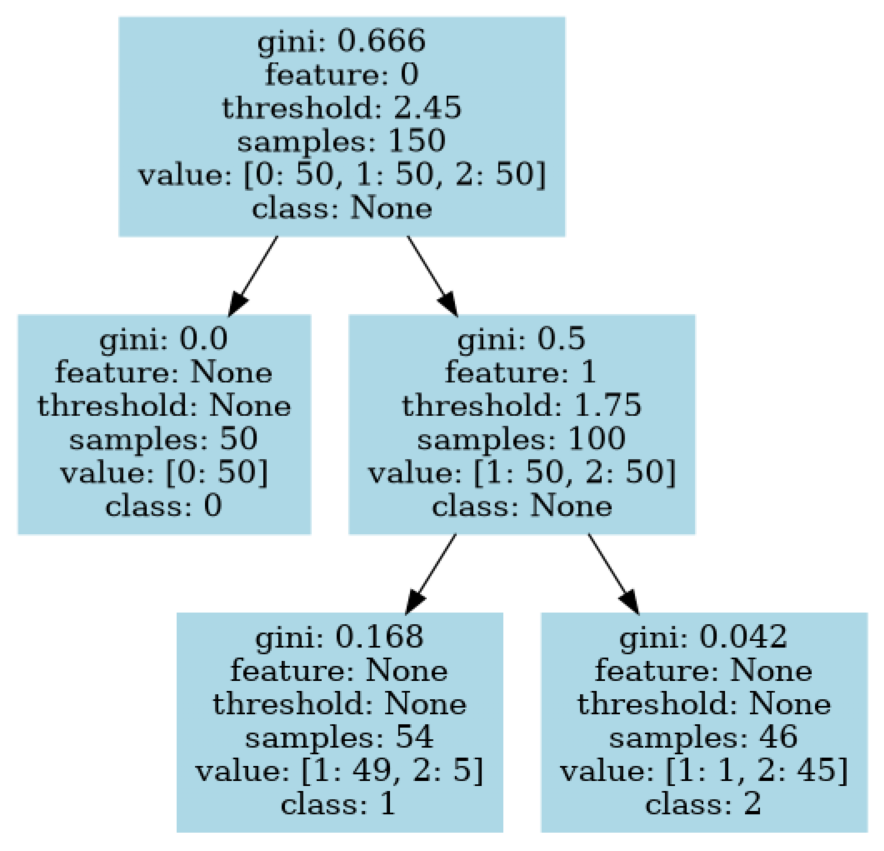

In [5]:
model = decision_tree.DecisionTree(cost_function=utils.gini)
train_classification(model, show=True)

DecisionTree(cost=gini, max_depth=10, min_samples_per_leaf=None, min_samples_per_split=None, max_features=None, pure_node=False, max_leaf_nodes=None)
Empirical risk: 0.02
Train accuracy: 0.98


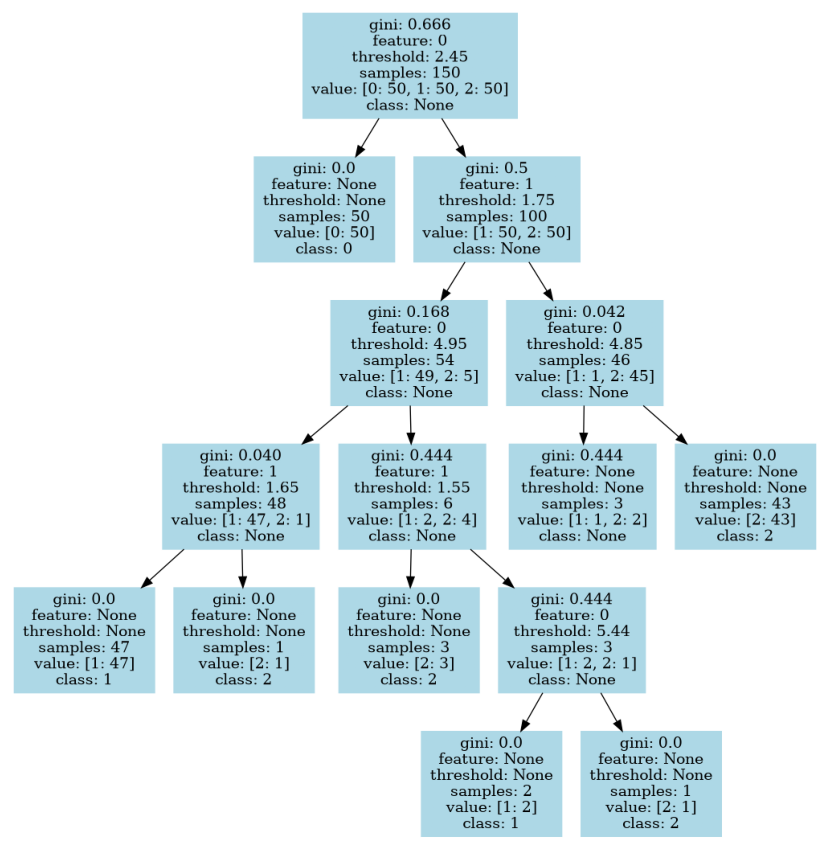

In [6]:
model = decision_tree.DecisionTree(cost_function=utils.gini, max_depth=10)
train_classification(model, show=True)

DecisionTree(cost=gini, max_depth=10, min_samples_per_leaf=10, min_samples_per_split=None, max_features=None, pure_node=False, max_leaf_nodes=None)
Empirical risk: 0.02
Train accuracy: 0.98


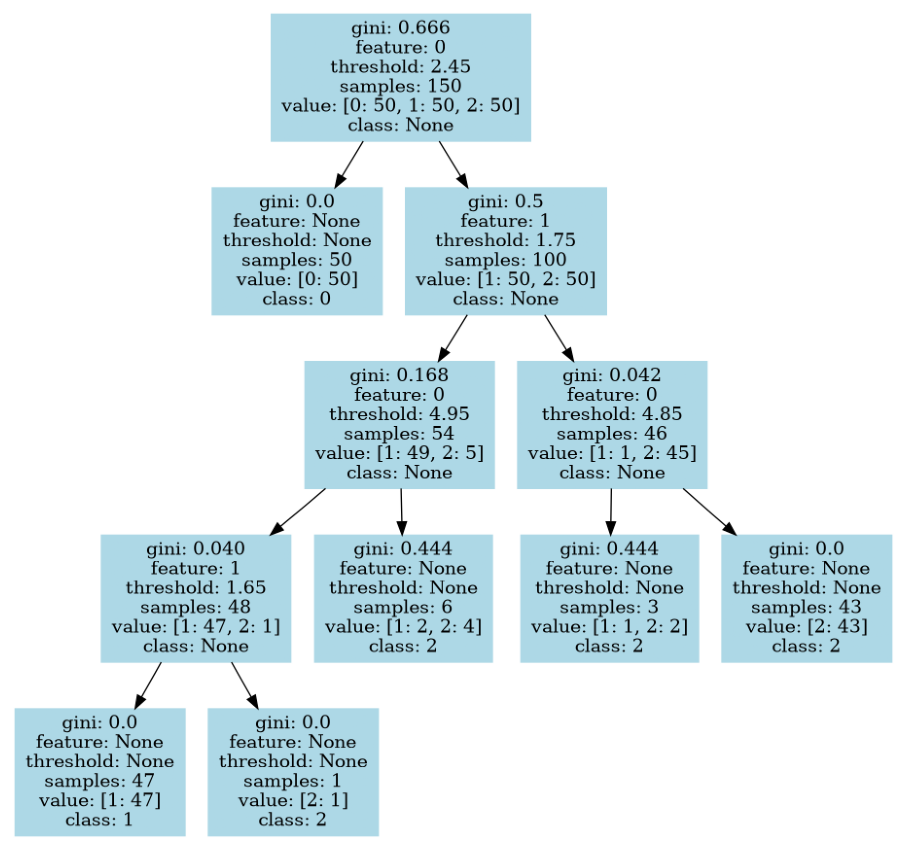

In [7]:
model = decision_tree.DecisionTree(cost_function=utils.gini, max_depth=10, min_samples_per_leaf=10)
train_classification(model, show=True)

Regression

In [8]:
def train_regression(model, X, y):
    model.fit(X, y)
    X_test, y_test = utils.create_dataset(n=100)
    risk_func = lambda y1,y2: ((y1-y2)**2).mean() 
    print("Empirical risk:", risk_func(model.predict(X),y))
    print("Test risk:", risk_func(model.predict(X_test),y_test))
    model.show()
    plt.scatter(X, y, s=10, alpha=0.5)
    plt.scatter(X, model.predict(X), s=2, alpha=0.5)

In [9]:
X_train, y_train = utils.create_dataset(n=500, noise=0.5)

Empirical risk: 0.005185578643464125
Test risk: 0.012841331548677275


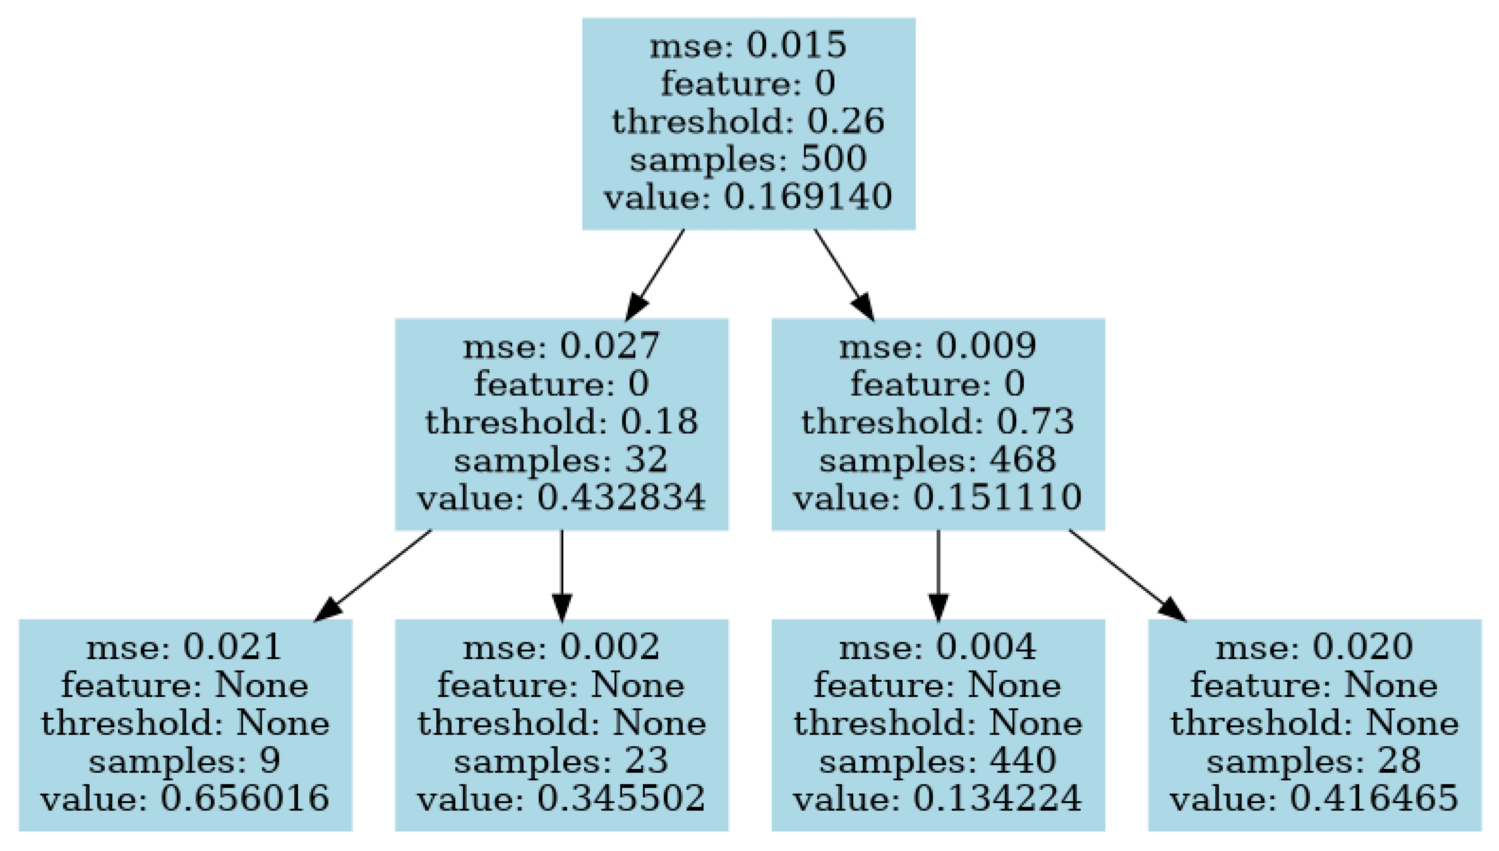

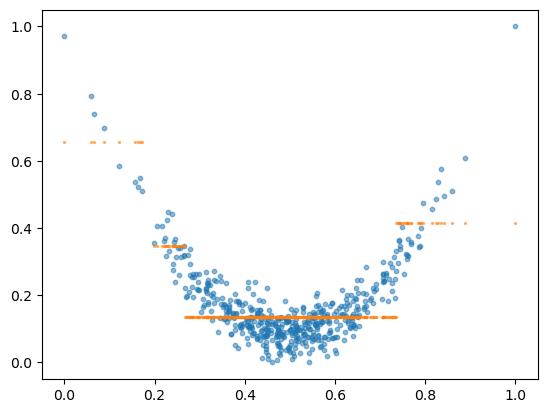

In [10]:
model = decision_tree.DecisionTree(cost_function=utils.mse)
train_regression(model, X_train, y_train)

Empirical risk: 0.0009002678327173495
Test risk: 0.01960680997800557


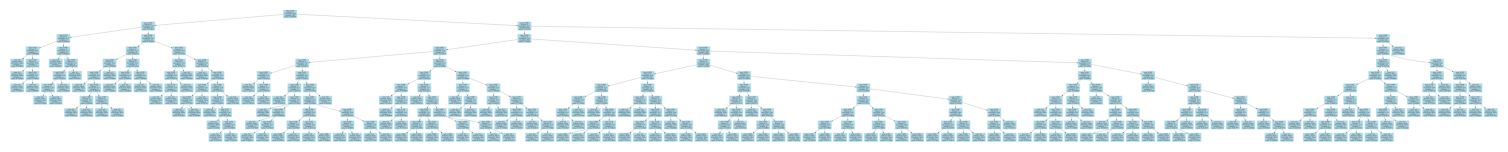

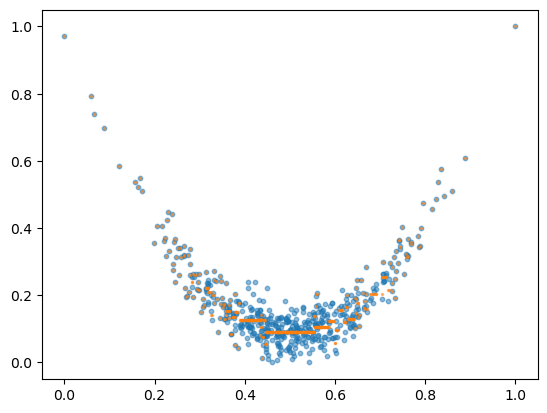

In [11]:
model = decision_tree.DecisionTree(cost_function=utils.mse, max_depth=10) # overfitting case
train_regression(model, X_train, y_train)

In [12]:
# TODO: random forest